In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Install PaddlePaddle and PaddleOCR
!pip install paddlepaddle paddleocr

# Install fuzzywuzzy for fuzzy string matching
!pip install fuzzywuzzy
!pip install python-Levenshtein

# Install pandas for DataFrame manipulation
!pip install pandas


  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from paddleocr import PaddleOCR, draw_ocr
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Need to run only once to download and load model into memory

# List of keywords to count
keywords = ["heineken","tiger","biaviet","larue","bivina","edelweiss","bialacviet","strongbow","biasaigon"]

# Function to map extracted text to closest keywords using fuzzy matching
def map_to_closest_keyword(text, keywords):
    words = text.split()
    mapped_words = []
    for word in words:
        match, score = process.extractOne(word.lower(), keywords, scorer=fuzz.token_sort_ratio)
        if score > 80:  # Threshold to consider a match (adjustable)
            mapped_words.append(match)
    return ' '.join(mapped_words)

# Function to count keyword occurrences
def count_keywords(text, keywords):
    keyword_counts = {keyword: text.lower().split().count(keyword) for keyword in keywords}
    return keyword_counts


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 245kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 569kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 154kiB/s]

[2024/06/29 10:51:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [4]:
# Path to your directory containing images
image_dir = '/content/drive/MyDrive/Khoaxinxiukhongignanhaaaa'

# Get list of image paths
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Initialize an empty list to store the results
results = []

# Iterate through each image
for image_path in image_paths:
    # Perform OCR
    result = ocr.ocr(image_path, cls=True)
    if result and result[0]:
        extracted_text = ' '.join([line[1][0] for line in result[0]])
        print(f"Extracted Text from {image_path}:", extracted_text)

        # Map the extracted text to closest keywords
        mapped_text = map_to_closest_keyword(extracted_text, keywords)
        print(f"Mapped Text from {image_path}:", mapped_text)

        # Count keywords in the mapped text
        keyword_counts = count_keywords(mapped_text, keywords)
        print(f"Keyword Counts from {image_path}:", keyword_counts)

        # Append the counts to the results list
        result_dict = {'image_path': image_path}
        result_dict.update(keyword_counts)
        results.append(result_dict)
    else:
        print(f"No text found in {image_path}")

[2024/06/29 10:51:35] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.22719216346740723
[2024/06/29 10:51:36] ppocr DEBUG: cls num  : 35, elapsed : 0.07187533378601074
[2024/06/29 10:51:37] ppocr DEBUG: rec_res num  : 35, elapsed : 1.0599024295806885


Extracted Text from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_1002.jpg:  .  Aider CRESSSL Heineken BIVINA CRYSTALE Etiger BIVINA Fliger. Heineker CRYSTALS Heincken K BIVI BIIINA BIVI EXP FTiger Heineken .Heineker BIV LARUE CRYSTALP
Mapped Text from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_1002.jpg: heineken bivina tiger bivina heineken heineken bivina tiger heineken heineken larue
Keyword Counts from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_1002.jpg: {'heineken': 5, 'tiger': 2, 'biaviet': 0, 'larue': 1, 'bivina': 3, 'edelweiss': 0, 'bialacviet': 0, 'strongbow': 0, 'biasaigon': 0}
[2024/06/29 10:51:37] ppocr DEBUG: dt_boxes num : 51, elapsed : 0.11726069450378418
[2024/06/29 10:51:38] ppocr DEBUG: cls num  : 51, elapsed : 0.09326481819152832
[2024/06/29 10:51:39] ppocr DEBUG: rec_res num  : 51, elapsed : 1.4374911785125732
Extracted Text from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_1001.jpg: oOOE ETiger CRYSTAL Heineken Tiger OTEPACK BIVIN BIV

Extracted Text from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_754.jpg: vinap MYHANH CHUVENTAPHOA-SIMSO-THECAO . 02923850048-0917141886 Bobby Diana Sotte
Mapped Text from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_754.jpg: 
Keyword Counts from /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_754.jpg: {'heineken': 0, 'tiger': 0, 'biaviet': 0, 'larue': 0, 'bivina': 0, 'edelweiss': 0, 'bialacviet': 0, 'strongbow': 0, 'biasaigon': 0}
[2024/06/29 10:51:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.10451579093933105
[2024/06/29 10:51:45] ppocr DEBUG: cls num  : 1, elapsed : 0.01912689208984375
[2024/06/29 10:51:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06765055656433105
No text found in /content/drive/MyDrive/Khoaxinxiukhongignanhaaaa/id_993.jpg
[2024/06/29 10:51:45] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.09743928909301758
[2024/06/29 10:51:45] ppocr DEBUG: cls num  : 6, elapsed : 0.009851217269897461
[2024/06/29 10:51:46] ppocr DEBUG: rec_res num  : 6, elapsed

In [5]:
# Create a DataFrame from the results
df = pd.DataFrame(results)

# Display the DataFrame
df

,image_path,heineken,tiger,biaviet,larue,bivina,edelweiss,bialacviet,strongbow,biasaigon
0,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,5,2,0,1,3,0,0,0,0
1,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,5,3,0,1,4,0,0,0,0
2,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,0,0,0,0,0,0,0,0,0
3,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,0,0,0,0,0,0,0,0,0
4,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,0,0,0,0,0,0,0,0,0
5,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,2,0,0,4,0,0,0,0,0
6,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,0,0,0,0,0,0,0,0,0
7,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,0,0,0,0,0,0,0,0,0
8,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,3,0,0,0,1,0,0,0,0
9,/content/drive/MyDrive/Khoaxinxiukhongignanhaa...,0,0,0,0,1,0,0,0,0


In [6]:
# Calculate the sum of each keyword
keyword_sums = df[keywords].sum()
print("Sum of each keyword:")
print(keyword_sums)

# Calculate the percentage of each keyword
total_counts = keyword_sums.sum()
keyword_percentages = (keyword_sums / total_counts) * 100
print("Percentage of each keyword:")
print(keyword_percentages)

Sum of each keyword:
heineken      18
tiger          5
biaviet        8
larue          6
bivina        11
edelweiss      0
bialacviet     0
strongbow      0
biasaigon      0
dtype: int64
Percentage of each keyword:
heineken      37.500000
tiger         10.416667
biaviet       16.666667
larue         12.500000
bivina        22.916667
edelweiss      0.000000
bialacviet     0.000000
strongbow      0.000000
biasaigon      0.000000
dtype: float64


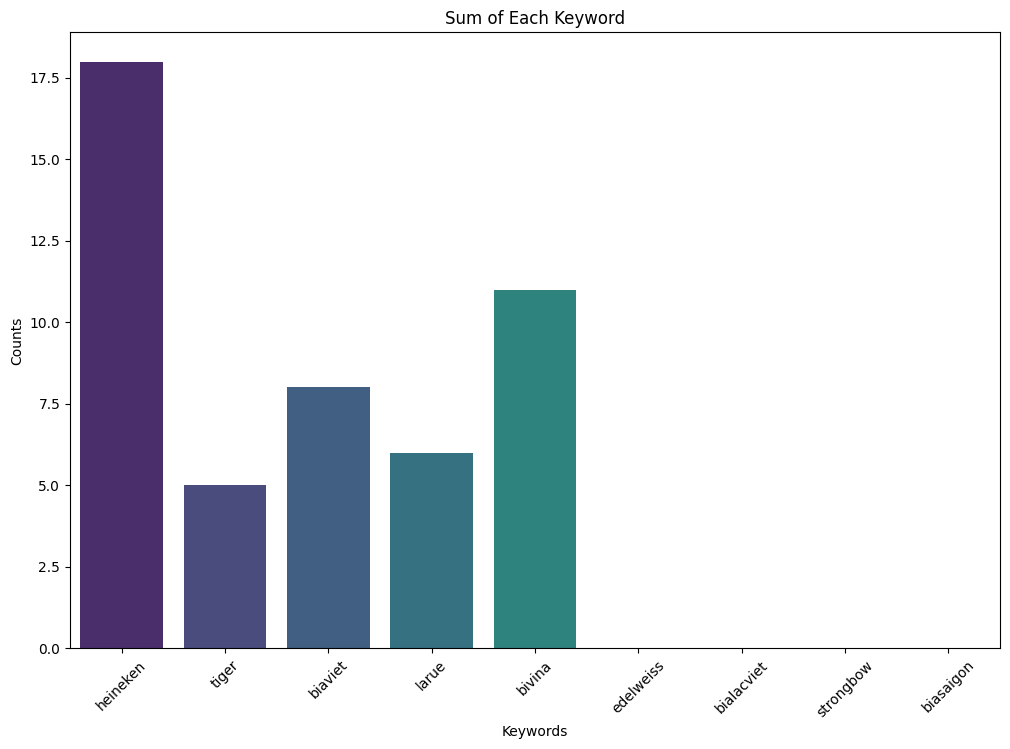

In [9]:
# Plot the sum of each keyword using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=keyword_sums.index, y=keyword_sums.values, palette='viridis')
plt.title('Sum of Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

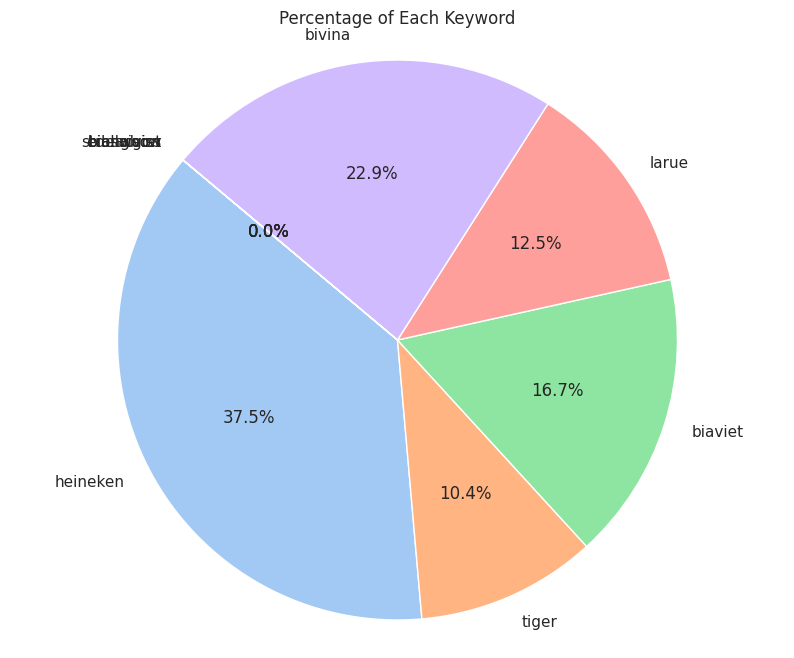

In [10]:
# Plot the percentage of each keyword using Seaborn
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
pie_plot = plt.pie(keyword_percentages, labels=keyword_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Keyword')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()